# Mesh creation tools

These mesh utilities 

In [1]:
import discretize
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use('ggplot')

## Get stretched grid with one stretching factor for various restrictions

- Source at 500 => Domain is centered around this point
- Frequency 10 Hz, Resistivity 1 Ohm m
- 2**5 cells

extent :     -295.8 - 1,198.4   ; min/max width:   31.8 - 65.6  ; stretching: 1.046


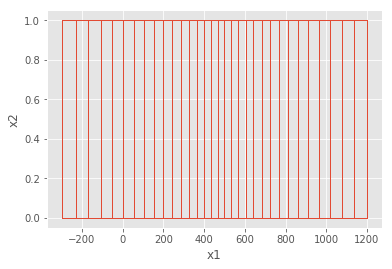

In [3]:
h_min, domain = discretize.utils.meshutils.get_domain(x0=500, freq=10, rho=1)

hx = discretize.utils.meshutils.get_stretched_h(h_min, domain, nx=2**5, x0=500)
grid = discretize.TensorMesh([hx, 1], x0=[domain[0], 0])
grid.plotGrid()

## As above, but with following additional restrictions

- My model goes from -800 to 3500, so I want this extent at least.
- I want the minimum cell width to be within 5-100 meters, no smaller, no wider.
- From 300 to 800 meter I want regular spacing with min cell width.

extent :     -800.0 - 3,101.7   ; min/max width:   31.8 - 697.4 ; stretching: 1.409


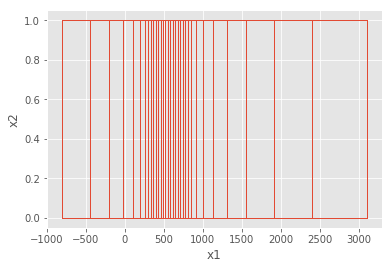

In [4]:
h_min, domain = discretize.utils.meshutils.get_domain(
    x0=500, freq=10, rho=1, limits=[-800, 3500], min_width=[5, 100])

hx = discretize.utils.meshutils.get_stretched_h(h_min, domain, nx=2**5, x0=300, x1=800)
grid = discretize.TensorMesh([hx, 1], x0=[domain[0], 0])
grid.plotGrid()

## As above, but for `f=0.1` instead

extent :   -7,457.9 - 7,109.5   ; min/max width:  100.0 - 1,448.4; stretching: 1.210


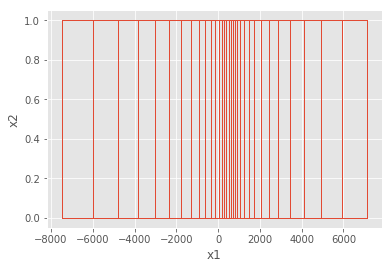

In [5]:
h_min, domain = discretize.utils.meshutils.get_domain(
    x0=500, freq=0.1, rho=1, limits=[-800, 3500], min_width=[5, 100])

hx = discretize.utils.meshutils.get_stretched_h(h_min, domain, nx=2**5, x0=300, x1=800)
grid = discretize.TensorMesh([hx, 1], x0=[domain[0], 0])
grid.plotGrid()